In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(1234)

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [3]:
def feature_preprocess(data_in):
    data = data_in.copy()
    data["Age"] = data["Age"].fillna(train["Age"].median())
    data["Pclass"] = data["Pclass"].fillna(train["Pclass"].mode())
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    data["Embarked"] = data["Embarked"].fillna(data["Embarked"].median())
    
    data["Age"] /= data["Age"].max()
    data["Embarked"] /= data["Embarked"].max()
    data["Pclass"] /= data["Pclass"].max()
    data["Sex"] /= data["Sex"].max()
    
    return data

In [21]:
def extract_feature(data):
    np_data = np.array(data[["Pclass","Sex","Age","Embarked"]].values, dtype=np.float32)
    return np_data
#     return np.array(data[["Sex","Age"]].values, dtype=np.float32)

In [5]:
feature_preprocess(train[32:64])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
32,33,1,1.000000,"Glynn, Miss. Mary Agatha",1,0.424242,0,0,335677,7.7500,NaN,1.0
33,34,0,0.666667,"Wheadon, Mr. Edward H",0,1.000000,0,0,C.A. 24579,10.5000,NaN,0.0
34,35,0,0.333333,"Meyer, Mr. Edgar Joseph",0,0.424242,1,0,PC 17604,82.1708,NaN,0.5
35,36,0,0.333333,"Holverson, Mr. Alexander Oskar",0,0.636364,1,0,113789,52.0000,NaN,0.0
36,37,1,1.000000,"Mamee, Mr. Hanna",0,0.424242,0,0,2677,7.2292,NaN,0.5
37,38,0,1.000000,"Cann, Mr. Ernest Charles",0,0.318182,0,0,A./5. 2152,8.0500,NaN,0.0
38,39,0,1.000000,"Vander Planke, Miss. Augusta Maria",1,0.272727,2,0,345764,18.0000,NaN,0.0
39,40,1,1.000000,"Nicola-Yarred, Miss. Jamila",1,0.212121,1,0,2651,11.2417,NaN,0.5
40,41,0,1.000000,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",1,0.606061,1,0,7546,9.4750,NaN,0.0
41,42,0,0.666667,"Turpin, Mrs. William John Robert (Dorothy Ann ...",1,0.409091,1,0,11668,21.0000,NaN,0.0


In [22]:
x = feature_preprocess(train)
y = feature_preprocess(test)

x_train = extract_feature(x)
y_train = np.array(x[["Survived"]].values, dtype=np.float32).flatten()

x_test = extract_feature(y)

In [7]:
class LogisticRegression:
    def __init__(self, threshold=0.5):
        self.threshold = threshold
        
    def predict(self, x):
        z = np.sum(x * self.W, axis=1)
        return 1 / (1 + np.exp(-z))

    def learn(self, x, y, learning_rate):
        y_hat = self.predict(x)
        new_W = np.matmul(x.T, y - y_hat)
        self.W = self.W + learning_rate * new_W
        
    def evaluate(self, x, y):
        y_pred = self.predict(x)
        return {
            "loss": -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)),
            "accuracy": np.sum((y_pred > self.threshold).astype(int) == y) / y.shape[0]
        }
    
    def fit(
        self, x, y, x_valid = None, y_valid = None,
        learning_rate = 0.001,
        learning_rate_decay = 1,
        batch_size = 32,
        epoch = 1,
        verbose = False
    ):
        self.W = np.random.rand(x.shape[1])
        if x_valid is None:
            x_valid = x
        if y_valid is None:
            y_valid = y
        step = x.shape[0] // batch_size + (x.shape[0] % 2 == 0)
        metric_graph = {
            "loss": [],
            "accuracy": []
        }
        for e in range(epoch):
            for i in range(step):
                self.learn(
                    x[batch_size * i : batch_size * (i + 1),],
                    y[batch_size * i : batch_size * (i + 1),],
                    learning_rate
                )
                metrics = self.evaluate(x_valid, y_valid)
                if (e <= 5 or (i + 1) == step) and verbose:
                    metrics = self.evaluate(x_valid, y_valid)
                    print("Epoch %d Step %d: Loss %f, Acc %f" % (e + 1, i + 1, metrics["loss"], metrics["accuracy"]))
            
            metrics = self.evaluate(x_valid, y_valid)
            metric_graph["loss"].append(metrics["loss"])
            metric_graph["accuracy"].append(metrics["accuracy"])
            learning_rate *= learning_rate_decay
        
        plt.plot(metric_graph["loss"])
        plt.title("Loss")
        plt.show()
        plt.title("Accuracy")
        plt.plot(metric_graph["accuracy"])
        plt.show()
        

Data Size: 891
Train Size: 623


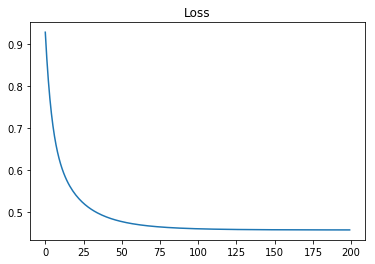

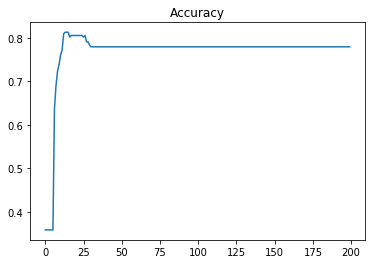

Weight [-1.96894941  2.60762739 -0.50209515  0.60266205]
Validate {'loss': 0.45758477244220896, 'accuracy': 0.77985074626865669}


In [25]:
learning_rate = 0.001
batch_size = 32
epoch = 200
threshold = 0.5

split_size = (int) (x_train.shape[0] * 0.7)
print("Data Size: %d\nTrain Size: %d" % (x_train.shape[0], split_size))

model = LogisticRegression(threshold=threshold)
model.fit(
    x_train[0:split_size], y_train[0:split_size], 
    x_valid = x_train[split_size:], y_valid = y_train[split_size:], 
    learning_rate=learning_rate, 
    batch_size=batch_size,
    epoch=epoch
)
print("Weight", model.W)

print("Validate", model.evaluate(x_train[split_size:], y_train[split_size:]))

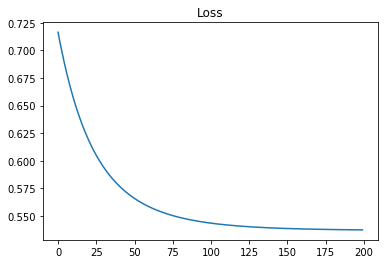

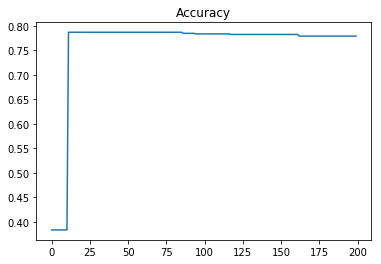

In [9]:
final_model = LogisticRegression(threshold=threshold)
final_model.fit(
    x_train, y_train,
    learning_rate=learning_rate, 
    batch_size=batch_size,
    epoch=epoch
)
y_out = (model.predict(x_test) > threshold).astype(int)
output = pd.DataFrame(test["PassengerId"])
output["Survived"] = y_out
output.to_csv("output.txt", index=False)